In [3]:
import pandas as pd     # Library for manipulating data using DataFrames
import numpy as np      # Library used for handling arrays and utils such as min()  
import seaborn as sns   # Library for data visualisation

First, let us load the data

In [4]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
(cancer_data['feature_names'], ['target'])

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 ['target'])

In [7]:
df = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],columns = np.append(cancer_data['feature_names'], ['target']))

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
df.shape

(569, 31)

In [10]:
print(df.corr()["target"].abs().sort_values(ascending=False)) 

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

Train test split:


In [12]:
from sklearn.model_selection import train_test_split
cancer_data = df.drop("target",axis=1)
target = df["target"]
X_train, X_test, y_train, y_test = train_test_split(cancer_data,target, test_size = 0.2)

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred= sv.predict(X_test)

print("The accuracy score achieved using Linear SVM is: "+str(accuracy_score(y_pred,y_test)*100)+" %")

The accuracy score achieved using Linear SVM is: 96.49122807017544 %


In [14]:
y_pred

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

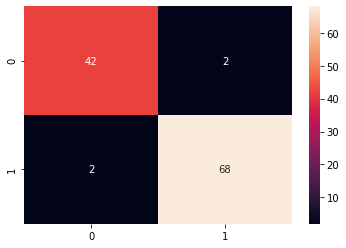

In [16]:
sns.heatmap(cm, annot=True)

In [18]:
from sklearn import preprocessing

norm_x_train= preprocessing.normalize(X_train)

In [19]:
norm_x_train

array([[1.51050512e-02, 1.54837914e-02, 9.86841066e-02, ...,
        1.01257312e-04, 3.41423170e-04, 9.10870233e-05],
       [1.95599358e-02, 3.72387573e-02, 1.26929555e-01, ...,
        1.57063910e-04, 4.75757542e-04, 1.58908498e-04],
       [1.29038090e-02, 1.18804586e-02, 8.33870680e-02, ...,
        9.02627036e-05, 2.22099017e-04, 5.60604143e-05],
       ...,
       [1.51752559e-02, 1.85427380e-02, 9.68690763e-02, ...,
        8.53850989e-05, 2.72312735e-04, 7.13323371e-05],
       [1.46467881e-02, 2.31454150e-02, 9.62459232e-02, ...,
        1.39796254e-04, 2.76923857e-04, 8.57150160e-05],
       [1.54793458e-02, 1.85434392e-02, 9.89702163e-02, ...,
        9.74381696e-05, 2.66235670e-04, 9.10716645e-05]])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

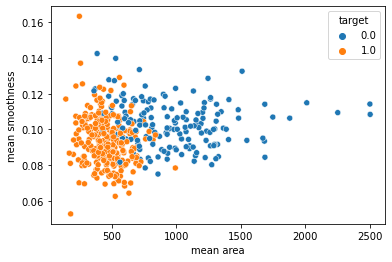

In [20]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)